## Bank Note Authentication

In [1]:
#Importing necessary libraries

import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
df = os.chdir("D:\\Naveen\\Interview Assignments\\Alpha AI")

In [3]:
#reference: https://stackoverflow.com/questions/59365994/how-to-create-column-names-from-txt-files-in-pandas-dataframe

data = pd.read_csv('data_banknote_authentication.txt', 
                   names=['variance', 'skewness', 'kurtosis', 'entropy', 'class'], header=None)
data

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
kurtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


We can see that there are no missing values in this dataset. 

In [6]:
#checking if the dataset is balanced or imbalanced. 

print(data['class'].value_counts())

0    762
1    610
Name: class, dtype: int64


There is not much difference between the counts of the positive and negative values. The dataset is balanced. 

## Exploratory data analysis

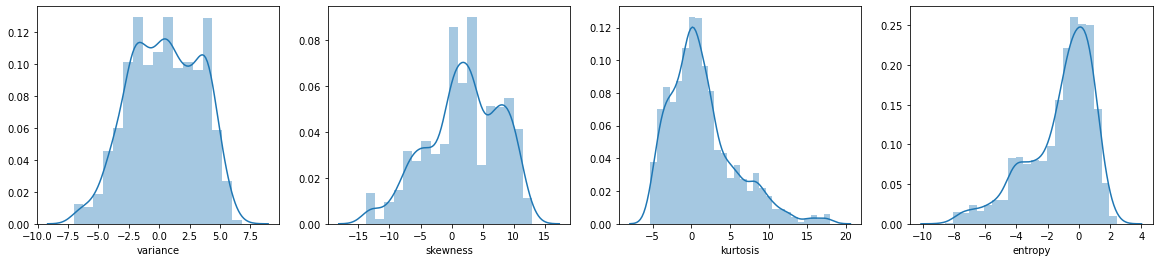

In [7]:
#Visualising the distribution of every attribute

fig,ax=plt.subplots(nrows=1 ,ncols=4)
sns.distplot(data['variance'],ax=ax[0])
sns.distplot(data['skewness'],ax=ax[1])
sns.distplot(data['kurtosis'],ax=ax[2])
sns.distplot(data['entropy'],ax=ax[3])
fig.set_figwidth(20)

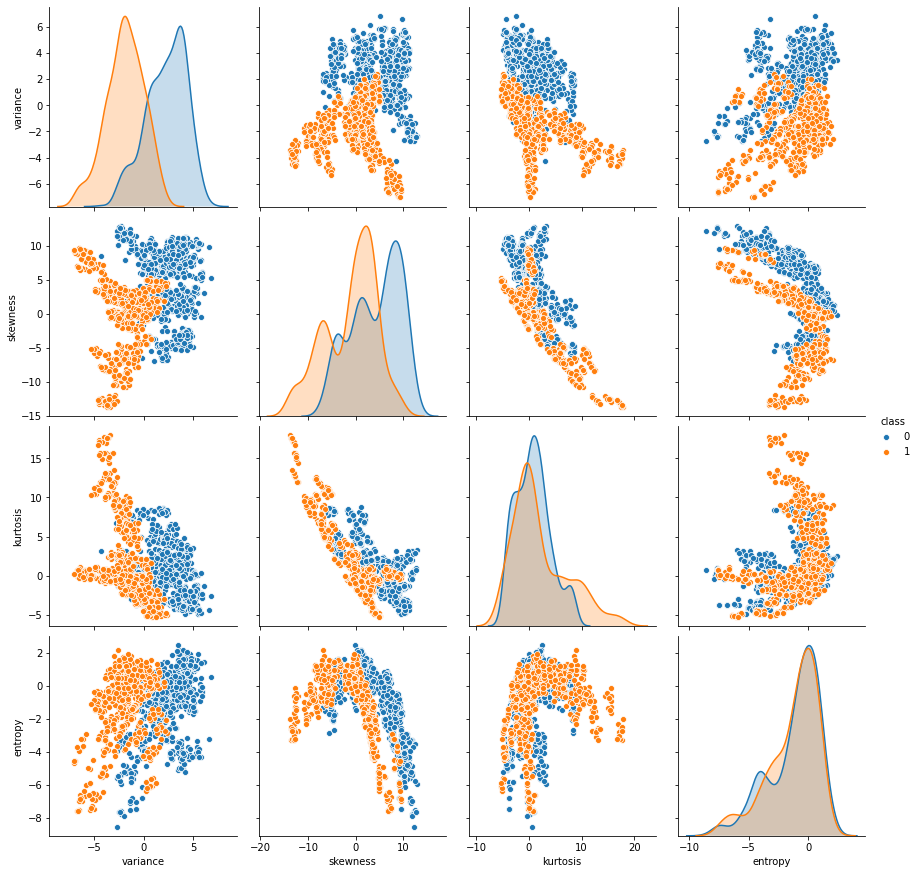

In [8]:
#Visualising and comparing all attributes

sns.pairplot(data, hue='class', size=3)

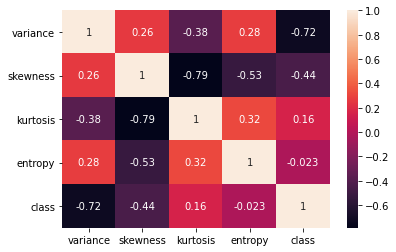

In [9]:
#Checking how the correlation is

sns.heatmap(data.corr(), annot = True)
plt.show()

## Data Pre-processing

In [10]:
#Spliting the dataset in independent and dependent variables

X = data.iloc[:, 0:4].values
y = data['class'].values

print(X.shape)
print(y.shape)

(1372, 4)
(1372,)


In [11]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [12]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Fitting a model

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred_logreg))
print(classification_report(y_test,y_pred_logreg))

[[150   9]
 [  0 116]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       159
           1       0.93      1.00      0.96       116

    accuracy                           0.97       275
   macro avg       0.96      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



In [14]:
#cross validation

from sklearn.model_selection import cross_val_score
print(cross_val_score(logreg, X_train, y_train, cv=5))

[0.98636364 0.99090909 0.98173516 0.99543379 0.97260274]


### Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

y_pred_dec_tree = dec_tree.predict(X_test)

print(confusion_matrix(y_test,y_pred_dec_tree))
print(classification_report(y_test,y_pred_dec_tree))

[[157   2]
 [  3 113]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       159
           1       0.98      0.97      0.98       116

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [16]:
#cross validation

print(cross_val_score(dec_tree, X_train, y_train, cv=5))

[0.99090909 0.98636364 0.98173516 0.98630137 0.98173516]


We have an accuracy of 98% using a Decision Tree Classifier. We will try pruning to see if the performance improves. 

#### Visualizing the tree

[Text(465.0, 849.375, 'X[0] <= 0.111\ngini = 0.495\nsamples = 1097\nvalue = [603, 494]'),
 Text(290.625, 736.125, 'X[1] <= 0.579\ngini = 0.349\nsamples = 594\nvalue = [134, 460]'),
 Text(182.67857142857144, 622.875, 'X[0] <= -0.294\ngini = 0.166\nsamples = 472\nvalue = [43, 429]'),
 Text(66.42857142857143, 509.625, 'X[2] <= 1.139\ngini = 0.073\nsamples = 367\nvalue = [14, 353]'),
 Text(33.214285714285715, 396.375, 'gini = 0.0\nsamples = 249\nvalue = [0, 249]'),
 Text(99.64285714285714, 396.375, 'X[1] <= -1.134\ngini = 0.209\nsamples = 118\nvalue = [14, 104]'),
 Text(66.42857142857143, 283.125, 'gini = 0.0\nsamples = 103\nvalue = [0, 103]'),
 Text(132.85714285714286, 283.125, 'X[0] <= -0.91\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(99.64285714285714, 169.875, 'X[0] <= -1.09\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(66.42857142857143, 56.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(132.85714285714286, 56.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text

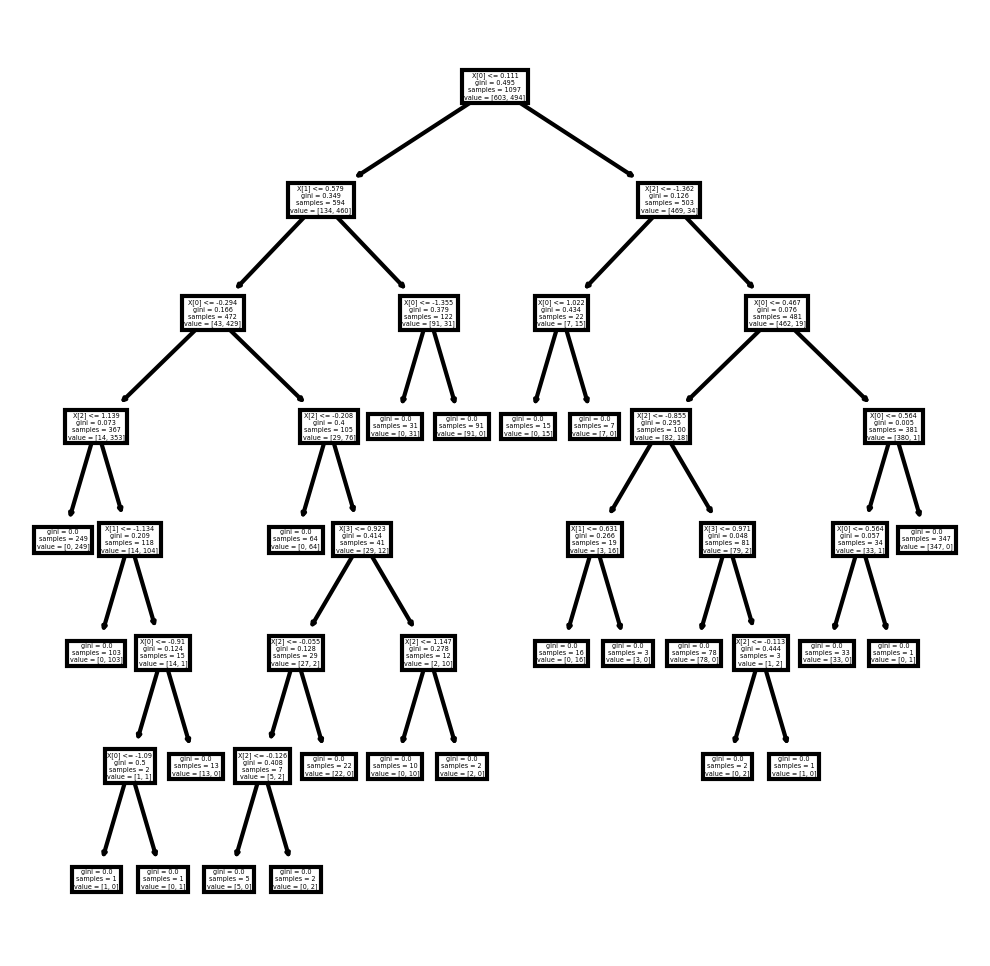

In [18]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dec_tree)

### Pruning

#### Gini

In [19]:
#Using Gini

dt_gini = DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 5, max_depth= 10, splitter = 'random', 
                                       max_leaf_nodes = 10)
dt_gini.fit(X_train, y_train)

y_pred_dt_gini = dt_gini.predict(X_test)

print(confusion_matrix(y_test,y_pred_dt_gini))
print(classification_report(y_test,y_pred_dt_gini))

[[149  10]
 [ 13 103]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       159
           1       0.91      0.89      0.90       116

    accuracy                           0.92       275
   macro avg       0.92      0.91      0.91       275
weighted avg       0.92      0.92      0.92       275



#### Visualizing the tree

[Text(372.0, 841.2857142857143, 'X[0] <= -0.596\ngini = 0.495\nsamples = 1097\nvalue = [603, 494]'),
 Text(186.0, 711.8571428571429, 'X[3] <= -2.061\ngini = 0.234\nsamples = 355\nvalue = [48, 307]'),
 Text(93.0, 582.4285714285714, 'gini = 0.5\nsamples = 35\nvalue = [17, 18]'),
 Text(279.0, 582.4285714285714, 'gini = 0.175\nsamples = 320\nvalue = [31, 289]'),
 Text(558.0, 711.8571428571429, 'X[0] <= 0.676\ngini = 0.377\nsamples = 742\nvalue = [555, 187]'),
 Text(465.0, 582.4285714285714, 'X[0] <= -0.221\ngini = 0.494\nsamples = 418\nvalue = [232, 186]'),
 Text(279.0, 453.00000000000006, 'X[3] <= -1.576\ngini = 0.348\nsamples = 116\nvalue = [26, 90]'),
 Text(186.0, 323.57142857142867, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(372.0, 323.57142857142867, 'X[1] <= 0.456\ngini = 0.256\nsamples = 106\nvalue = [16, 90]'),
 Text(279.0, 194.14285714285722, 'gini = 0.165\nsamples = 99\nvalue = [9, 90]'),
 Text(465.0, 194.14285714285722, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(

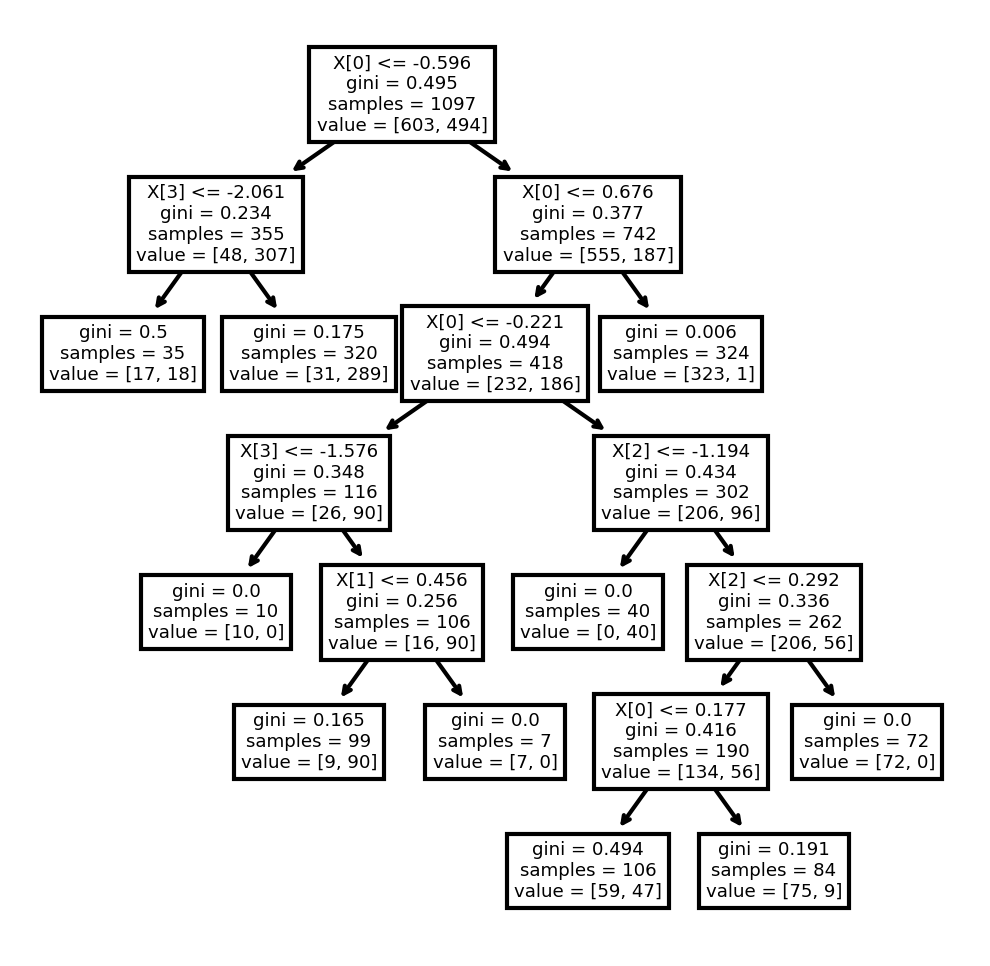

In [20]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_gini)

#### Entropy

In [21]:
#Using entropy

dt_ent = DecisionTreeClassifier(criterion = "entropy", min_samples_leaf = 5, max_depth= 5)
dt_ent.fit(X_train, y_train)

y_pred_dt_ent = dt_ent.predict(X_test)

print(confusion_matrix(y_test,y_pred_dt_ent))
print(classification_report(y_test,y_pred_dt_ent))

[[154   5]
 [  1 115]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       159
           1       0.96      0.99      0.97       116

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



#### Visualizing the tree

[Text(564.6428571428571, 830.5, 'X[0] <= 0.111\nentropy = 0.993\nsamples = 1097\nvalue = [603, 494]'),
 Text(332.14285714285717, 679.5, 'X[1] <= 0.579\nentropy = 0.77\nsamples = 594\nvalue = [134, 460]'),
 Text(199.28571428571428, 528.5, 'X[2] <= -0.143\nentropy = 0.44\nsamples = 472\nvalue = [43, 429]'),
 Text(132.85714285714286, 377.5, 'entropy = 0.0\nsamples = 209\nvalue = [0, 209]'),
 Text(265.7142857142857, 377.5, 'X[0] <= -0.32\nentropy = 0.643\nsamples = 263\nvalue = [43, 220]'),
 Text(132.85714285714286, 226.5, 'X[1] <= -0.332\nentropy = 0.323\nsamples = 221\nvalue = [13, 208]'),
 Text(66.42857142857143, 75.5, 'entropy = 0.046\nsamples = 195\nvalue = [1, 194]'),
 Text(199.28571428571428, 75.5, 'entropy = 0.996\nsamples = 26\nvalue = [12, 14]'),
 Text(398.57142857142856, 226.5, 'X[3] <= 0.923\nentropy = 0.863\nsamples = 42\nvalue = [30, 12]'),
 Text(332.14285714285717, 75.5, 'entropy = 0.353\nsamples = 30\nvalue = [28, 2]'),
 Text(465.0, 75.5, 'entropy = 0.65\nsamples = 12\nvalu

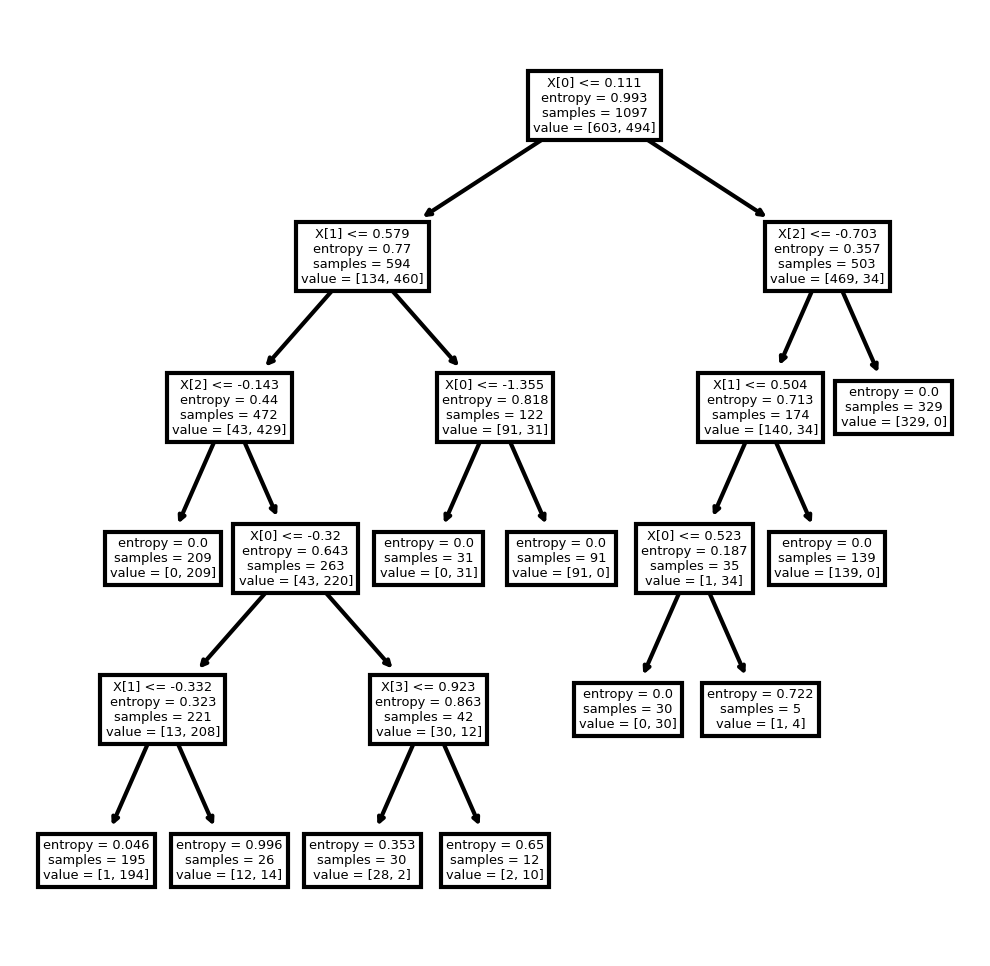

In [22]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_ent)

#### Log Loss 

In [23]:
# Decision tree without pruning

from sklearn.metrics import log_loss
l_l_dt = log_loss(y_test, y_pred_dec_tree)
print("The log loss score is:", l_l_dt)

The log loss score is: 0.6279835678887784


In [24]:
#Decision Tree - Gini

l_l_dt_gini = log_loss(y_test, y_pred_dt_gini)
print("The log loss score is:", l_l_dt_gini)

The log loss score is: 2.888726738389992


In [25]:
#Decision Tree - Entropy

l_l_dt_ent = log_loss(y_test, y_pred_dt_ent)
print("The log loss score is:", l_l_dt_ent)

The log loss score is: 0.753587841296783


### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 3, max_features = 0.5, n_jobs = -1)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

print(confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

[[158   1]
 [  1 115]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       0.99      0.99      0.99       116

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [27]:
#cross validation

print(cross_val_score(rfc, X_train, y_train, cv=5))

[1.         0.99545455 1.         0.98630137 0.99543379]


The similar accuracy and cross validation scores for each model shows that the models are not overfitted. 

### Checking accuracy scores of test data

In [28]:
#Logistic Regression
acc_logreg = logreg.score(X_test, y_test)*100
print(acc_logreg)

96.72727272727273


In [29]:
#Decision Tree Classifier
acc_dec_tree = dec_tree.score(X_test, y_test)*100
print(acc_dec_tree)

98.18181818181819


In [30]:
#Decision Tree Classifier - Gini

acc_dt_gini = dt_gini.score(X_test, y_test)*100
print(acc_dt_gini)

91.63636363636364


In [31]:
#Decision Tree Classifier - Entropy

acc_dt_ent = dt_ent.score(X_test, y_test)*100
print(acc_dt_ent)

97.81818181818181


In [32]:
#Random Forest Classifier
acc_rfc = rfc.score(X_test, y_test)*100
print(acc_rfc)

99.27272727272727


### Sorting according to the test data accuracy

In [33]:
models = pd.DataFrame({
'Model': ['Logistic Regression', 'Decision Tree', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forest'],
'Score': [acc_logreg, acc_dec_tree, acc_dt_gini, acc_dt_ent, acc_rfc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,99.272727
1,Decision Tree,98.181818
3,Decision Tree Entropy,97.818182
0,Logistic Regression,96.727273
2,Decision Tree Gini,91.636364
